In [119]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("C:/Users/Subham Das/OneDrive/Desktop/Data_set/ecommerce_product_performance.csv")
df

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,NaN,7.0
4,126.584663,0.411845,3.553082,671.0,1.0,14.0,0.672163,6.0
...,...,...,...,...,...,...,...,...
1995,257.015024,0.098708,3.805205,398.0,1.0,7.0,NaN,5.0
1996,NaN,0.679901,3.340395,788.0,NaN,17.0,0.195181,10.0
1997,61.812535,0.081616,2.736741,297.0,1.0,7.0,0.293520,7.0
1998,133.693304,0.346151,3.246759,467.0,1.0,6.0,0.362834,8.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       1900 non-null   float64
 1   Discount_Rate       1900 non-null   float64
 2   Product_Rating      1900 non-null   float64
 3   Number_of_Reviews   1900 non-null   float64
 4   Stock_Availability  1900 non-null   float64
 5   Days_to_Deliver     1900 non-null   float64
 6   Return_Rate         1900 non-null   float64
 7   Category_ID         1900 non-null   float64
dtypes: float64(8)
memory usage: 125.1 KB


In [125]:
df.shape

(2000, 8)

In [127]:
df.isnull().sum()

Product_Price         100
Discount_Rate         100
Product_Rating        100
Number_of_Reviews     100
Stock_Availability    100
Days_to_Deliver       100
Return_Rate           100
Category_ID           100
dtype: int64

In [129]:
df.duplicated().sum()

0

In [131]:
#Missing values present (~5%) So I Handle missing values using mean And Avoids bias....
df = df.fillna(df.mean())

In [133]:
df.isnull().sum()

Product_Price         0
Discount_Rate         0
Product_Rating        0
Number_of_Reviews     0
Stock_Availability    0
Days_to_Deliver       0
Return_Rate           0
Category_ID           0
dtype: int64

In [135]:
df.describe()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,156.774274,0.286993,3.729987,304.318421,0.903158,15.411579,0.328904,5.572105
std,91.116277,0.154984,0.862740,302.482457,0.288326,8.317852,0.171839,2.755968
min,5.000000,0.005368,1.000000,0.000000,0.000000,1.000000,0.006528,1.000000
25%,90.822298,0.170780,3.170359,92.000000,1.000000,8.750000,0.197575,3.000000
50%,156.774274,0.277835,3.729987,225.500000,1.000000,15.411579,0.325026,5.572105
75%,213.818644,0.384355,4.379557,414.250000,1.000000,22.000000,0.434611,8.000000
max,535.273149,0.800000,5.000000,2848.000000,1.000000,30.000000,0.900000,10.000000


In [ ]:
#Product Performance KPIs.....

In [100]:
avg_rating = df["Product_Rating"].mean()
avg_return = df["Return_Rate"].mean()
avg_delivery = df["Days_to_Deliver"].mean()

avg_rating, avg_return, avg_delivery


(3.7299871466500845, 0.3289044016338568, 15.41157894736842)

In [ ]:
#Product Price Distribution......

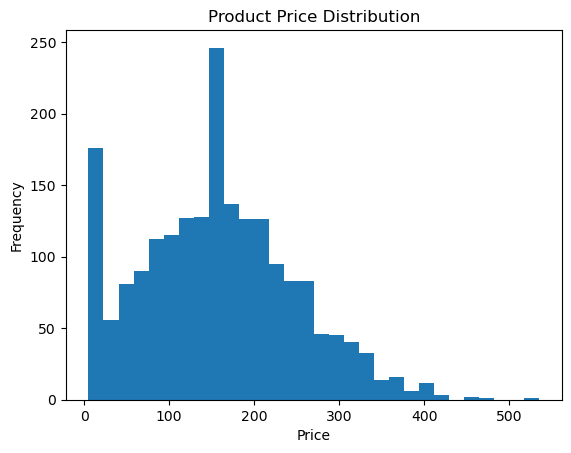

In [103]:
plt.figure()
plt.hist(df["Product_Price"], bins=30)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#Product Rating Distribution.....

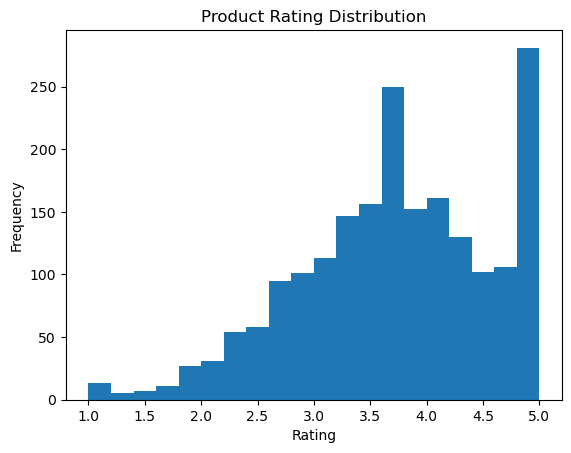

In [105]:
plt.figure()
plt.hist(df["Product_Rating"], bins=20)
plt.title("Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Discount Rate vs Return Rate.....

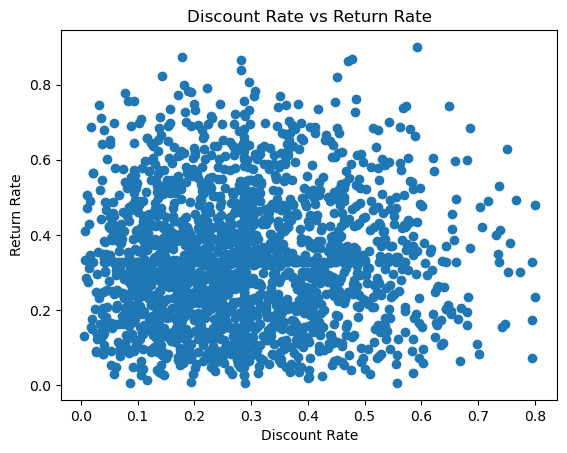

In [107]:
plt.figure()
plt.scatter(df["Discount_Rate"], df["Return_Rate"])
plt.title("Discount Rate vs Return Rate")
plt.xlabel("Discount Rate")
plt.ylabel("Return Rate")
plt.show()

In [ ]:
#Delivery Time vs Product Rating.....

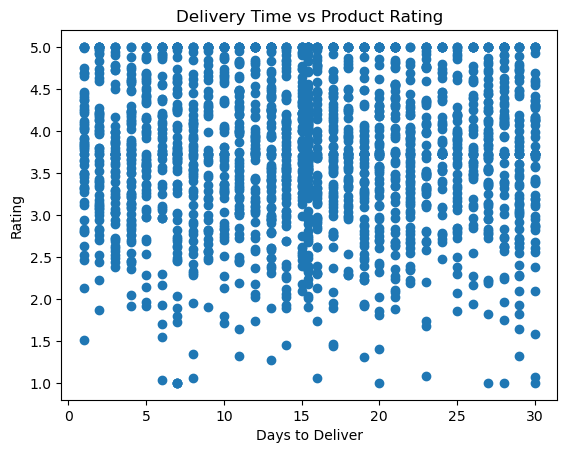

In [109]:
plt.figure()
plt.scatter(df["Days_to_Deliver"], df["Product_Rating"])
plt.title("Delivery Time vs Product Rating")
plt.xlabel("Days to Deliver")
plt.ylabel("Rating")
plt.show()

In [ ]:
#Category-wise Product Performance.....

In [111]:
category_analysis = df.groupby("Category_ID").agg({
    "Product_Rating": "mean",
    "Return_Rate": "mean",
    "Product_Price": "mean"
})

category_analysis

,Product_Rating,Return_Rate,Product_Price
Category_ID,,,
1.000000,3.711043,0.327609,149.938014
2.000000,3.695163,0.310060,157.432480
3.000000,3.741272,0.342726,163.120475
4.000000,3.679544,0.320680,156.298384
5.000000,3.752304,0.336460,156.310725
5.572105,3.790334,0.356713,148.238019
6.000000,3.751538,0.316244,151.340006
7.000000,3.769237,0.328242,146.403667
8.000000,3.690235,0.332253,161.322349


In [ ]:
#Correlation Analysis.......

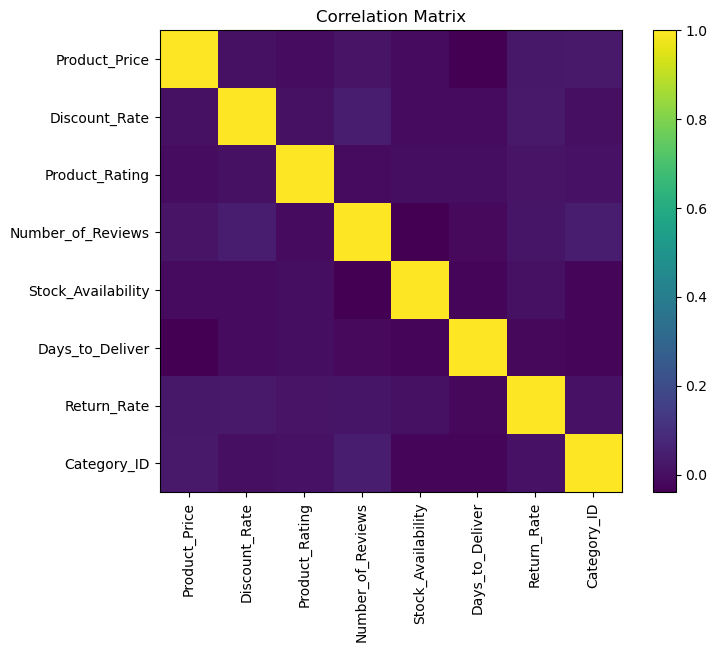

In [113]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Predict Return Rate Prediction....

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("Return_Rate", axis=1)
y = df["Return_Rate"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.029741529851203385
R2 Score: -0.007646495339844961


In [ ]:
Key Business Insights (Markdown)

✔ High discounts increase return rates
✔ Faster delivery improves customer ratings
✔ Some categories require better quality control
✔ Pricing alone does not guarantee performance